In [15]:
import pandas as pd
from safedigital import mechanical
import os
import numpy as np
import matplotlib.pyplot as plt


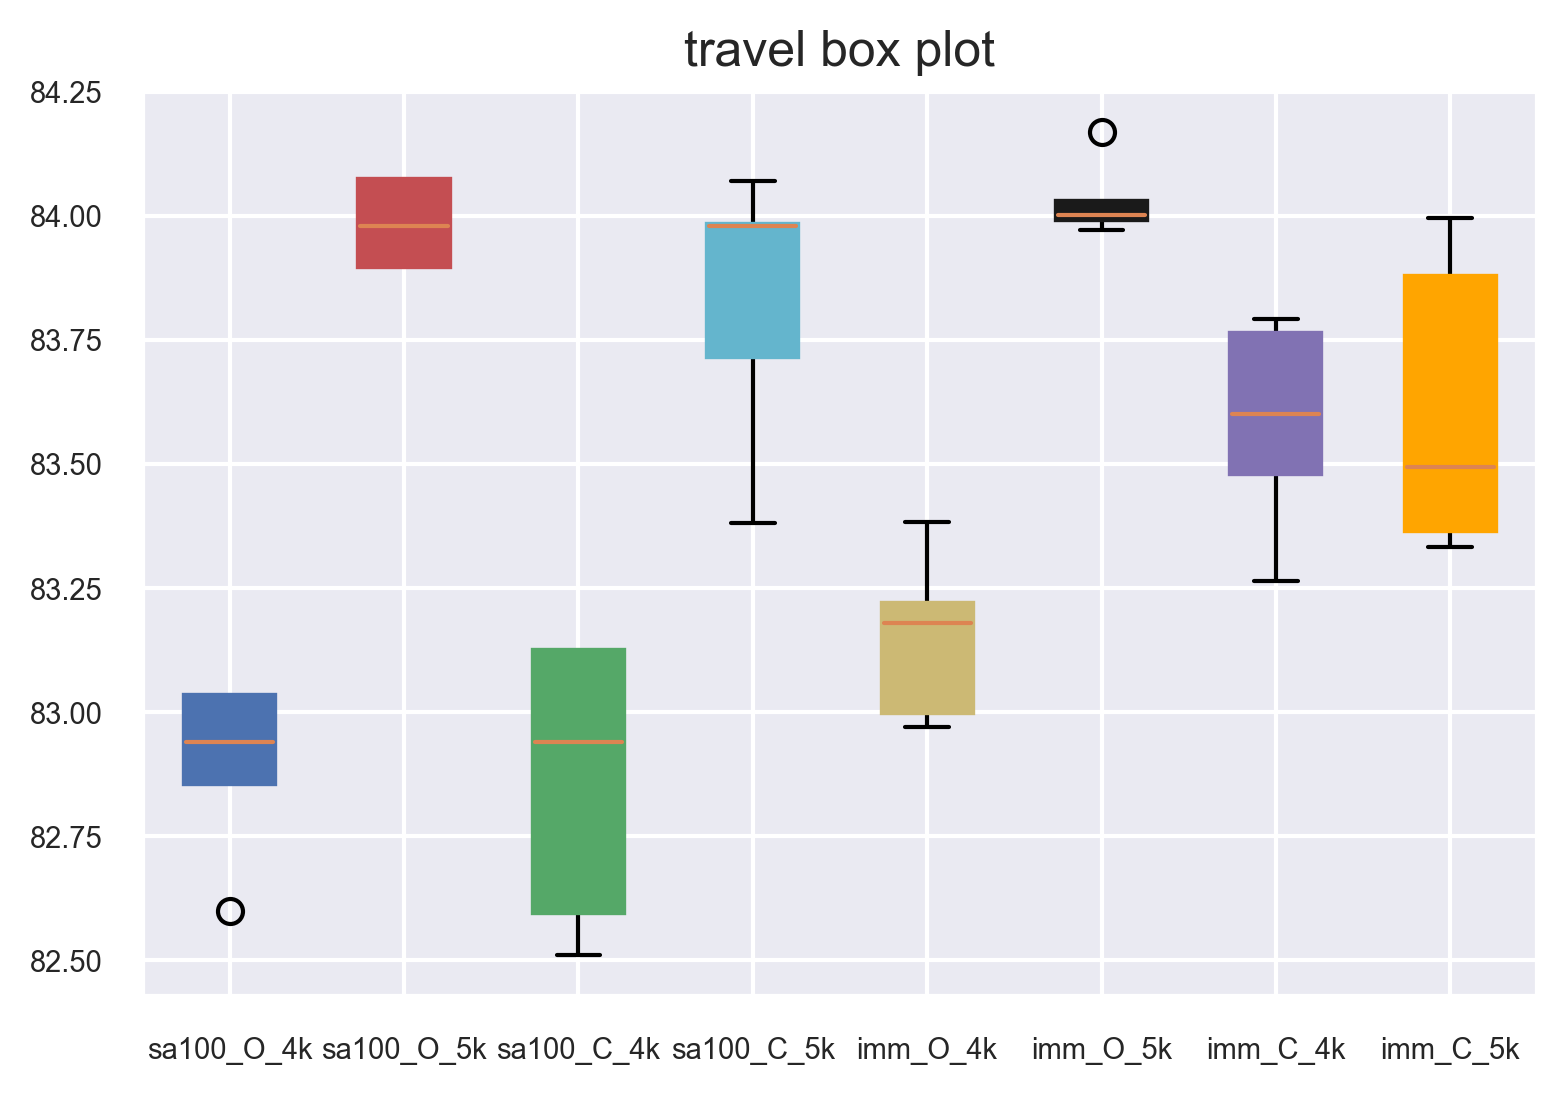

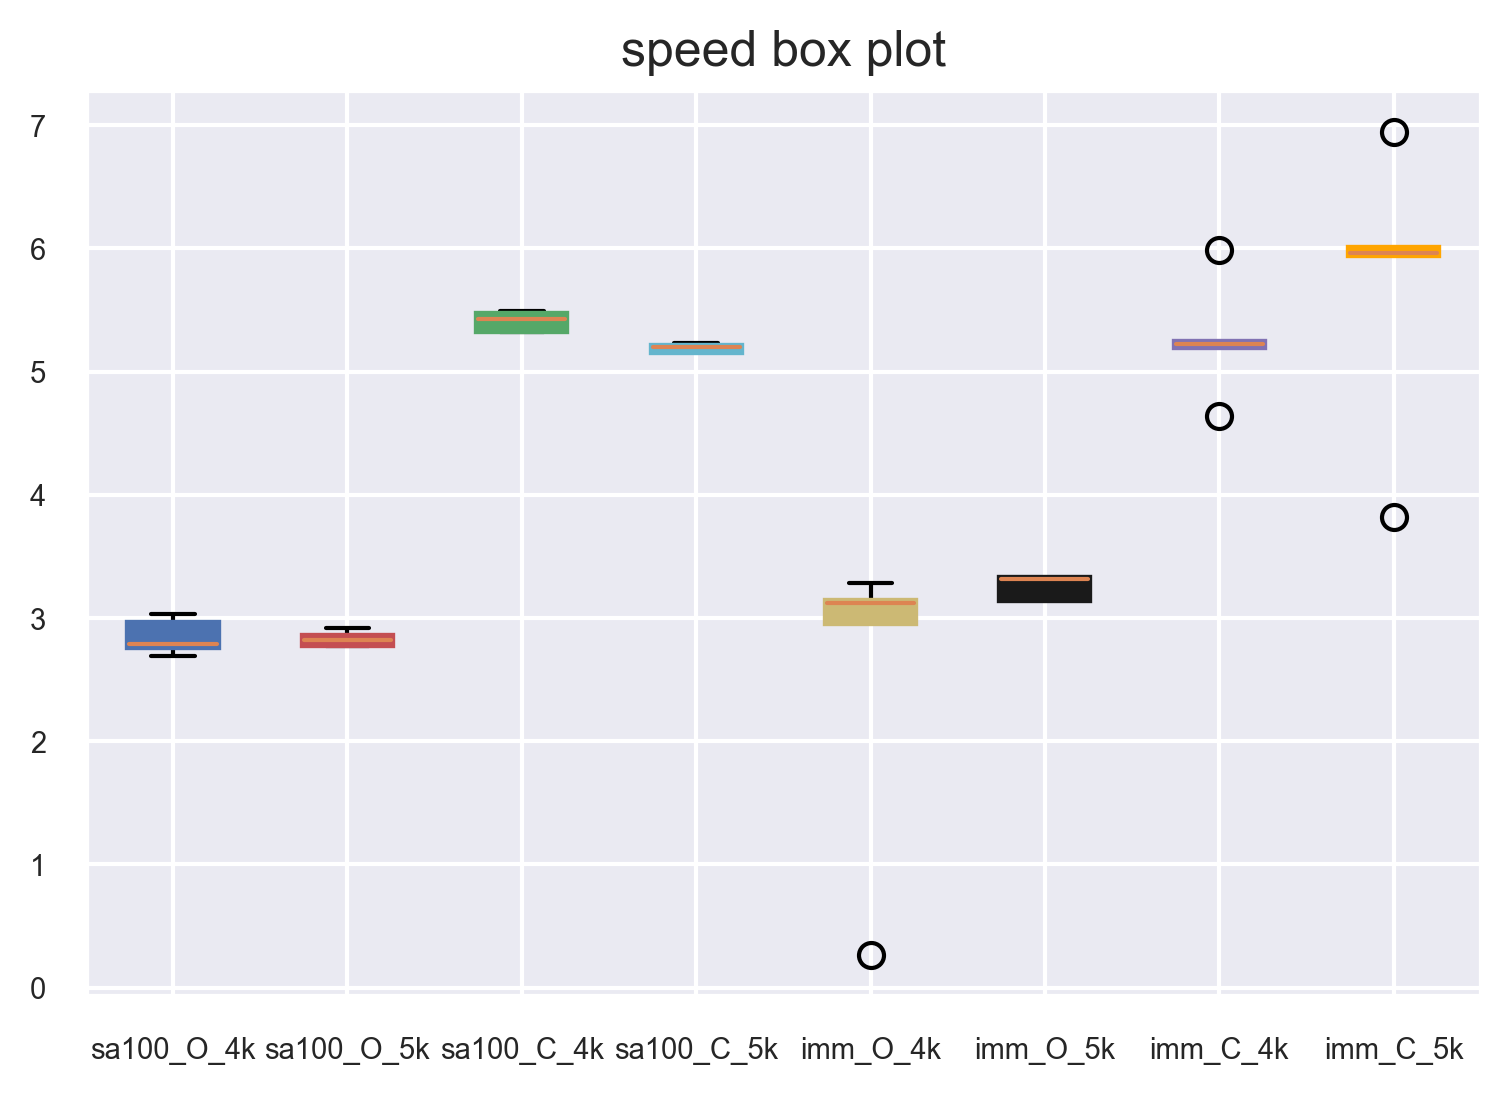

In [16]:
imm_data_folder = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\2022xxxx_ME_test\2022_06_14_SA100_VS_IMM'
# load data from SA100
result_dict = {'sa100_open_deg':[83.03,83.03,82.86,82.94,82.60,83.90,83.90,83.98,84.07,84.07], 
			   'sa100_open_spd':[3.03,2.95,2.79,2.77,2.69,2.92,2.85,2.79,2.82,2.77],
			   'sa100_close_deg':[83.12,83.12,82.94,82.51,82.60,83.38,83.72,84.07,83.98,83.98],
			   'sa100_close_spd':[5.34,5.32,5.46,5.49,5.43,5.20,5.23,5.20,5.17,5.17],
			   'imm_open_deg':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_open_spd':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_close_deg':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			   'imm_close_spd':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

result_df = pd.DataFrame(result_dict,index=['4000_1','4000_2','4000_3','4000_4','4000_5',
											'5000_1','5000_2','5000_3','5000_4','5000_5'])

file_list = os.listdir(imm_data_folder)
open_angle_file_list,close_angle_file_list = [],[]

# find open angle data and close angle data separately 
for file in file_list:
	if ('ang' in file) and ('open' in file) :
		open_angle_file_list.append(file)
	elif ('ang' in file) and ('close' in file): 
		close_angle_file_list.append(file)

# calculate travel and speed from open angle data
for num, file in enumerate(open_angle_file_list):
	case_open = mechanical.MechOper(imm_data_folder + '\\' + file)
	ang_data = np.array(case_open.data.iloc[:,0])
	head,tail = mechanical.MechOper.find_head_tail(ang_data)
	travel,angle_open,angle_close  = case_open.travel(head,tail)
	speed = case_open.avg_speed(ang_data/100, 
								'O', 
								travel, 
								angle_close)
	# print('file_name',file)
	# print('speed','{:.2f}'.format(speed))
	# print('travel','{:.2f}'.format(travel))
	result_df.iloc[num,4] = travel
	result_df.iloc[num,5] = speed

# calculate travel and speed from close angle data
for num, file in enumerate(close_angle_file_list):
	case_close = mechanical.MechOper(imm_data_folder + '\\' + file)
	ang_data = np.array(case_close.data.iloc[:, 0])
	head,tail = mechanical.MechOper.find_head_tail(ang_data)
	travel,angle_open,angle_close  = case_close.travel(head,tail)
	# print('travel,angle_open,angle_close',travel, angle_open, angle_close)
	speed = case_open.avg_speed(ang_data/100, 
								'C', 
								travel, 
								angle_close)
	# print('file_name',file)
	# print('speed','{:.2f}'.format(speed))
	# print('travel','{:.2f}'.format(travel))
	result_df.iloc[num, 6] = travel
	result_df.iloc[num, 7] = speed

label_list = ['sa100_O_4k', 
			  'sa100_O_5k', 
			  'sa100_C_4k', 
			  'sa100_C_5k', 
			  'imm_O_4k', 
			  'imm_O_5k', 
			  'imm_C_4k', 
			  'imm_C_5k'] 

box_color_list = ['b','r','g','c','y','k','m','orange']



# re-structure the result dataframe into narray
result_4k_narray = np.array(result_df.iloc[0:5, :])
result_5k_narray = np.array(result_df.iloc[5:, :])
result_narray = np.concatenate((result_4k_narray, result_5k_narray), axis=1)


# Box plot
plt.figure(dpi=300)
plt.title('travel box plot')
mechanical.MechOper.box_plot(label_list, 
							 result_narray[:,[0,8,2,10,4,12,6,14]], 
							 box_color_list)

plt.figure(dpi=300)
plt.title('speed box plot')
mechanical.MechOper.box_plot(label_list, 
							 result_narray[:,[1,9,3,11,5,13,7,15]], 
							 box_color_list)

 


# line and scatter plot for open travel and error

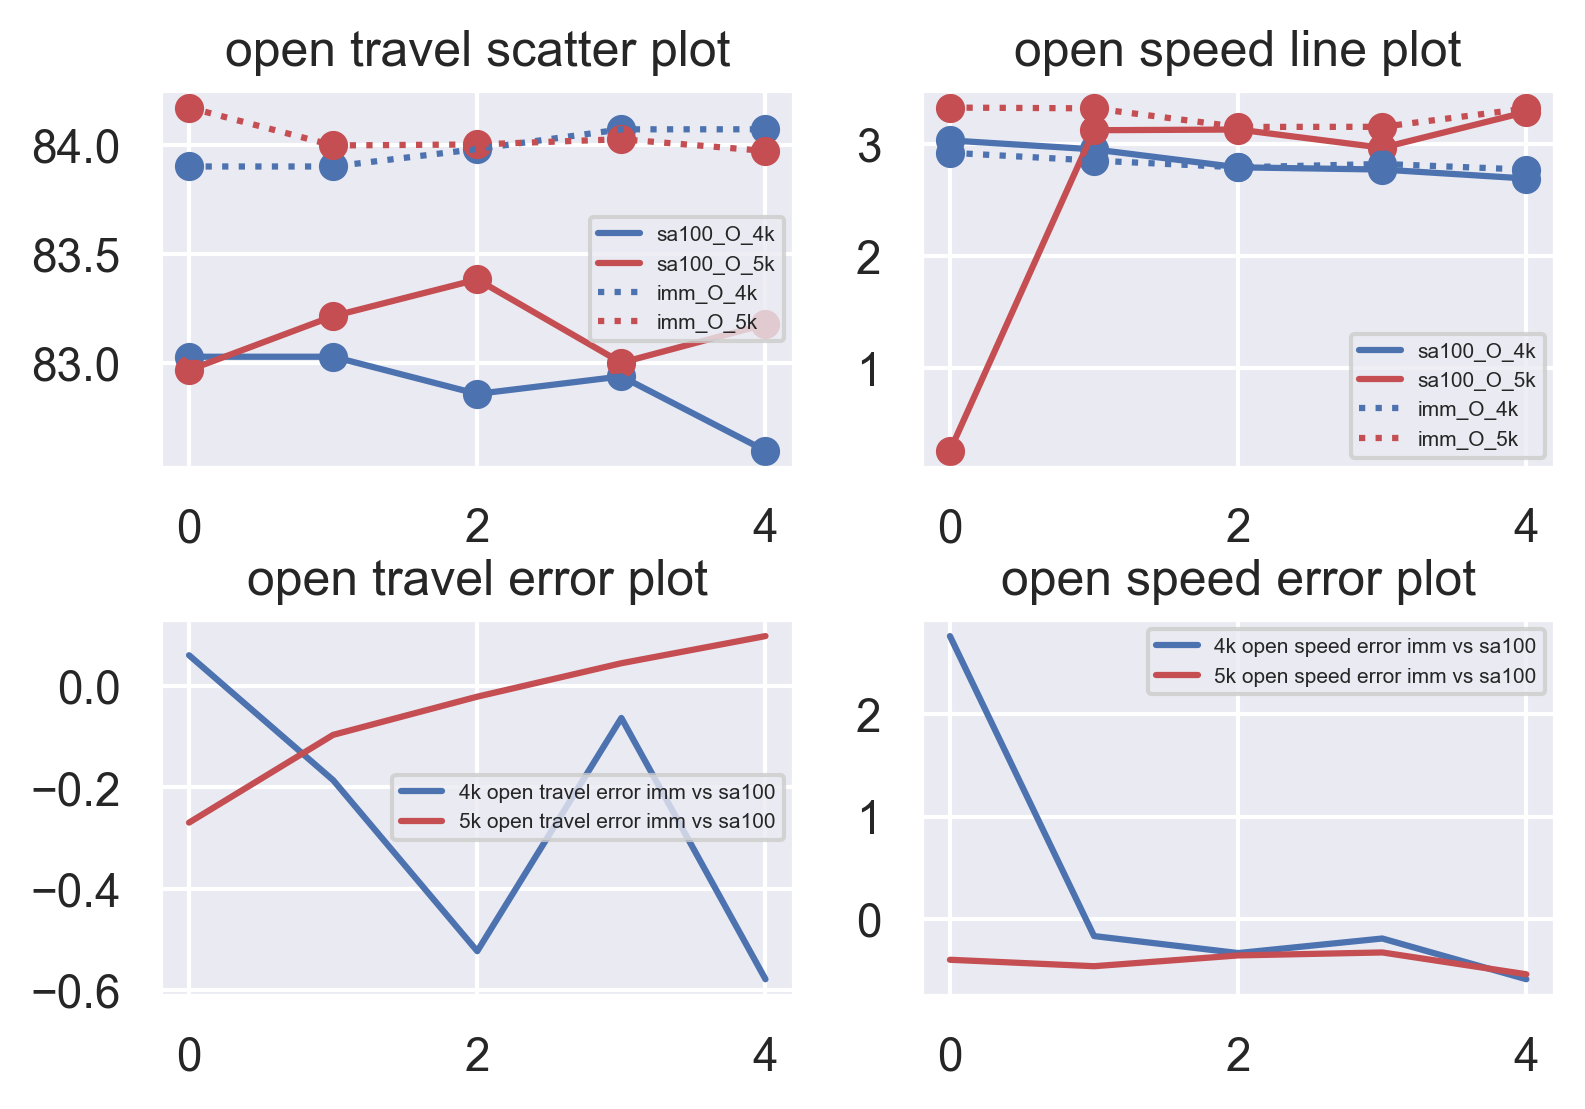

In [17]:
# line plot for open travel and error
line_list = ['-','-',':',':']
line_color_list = ['b','r','b','r']
line_label_list = ['sa100_O_4k','sa100_O_5k','imm_O_4k','imm_O_5k']
plt.figure(dpi=300)
plt.subplot(2,2,1)
plt.title('open travel scatter plot')
for num, ele in enumerate([0,4,8,12]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,3)
plt.title('open travel error plot')
plt.plot(result_narray[:,0] - 
		 result_narray[:,4], 
		 label='4k open travel error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,8] - 
		 result_narray[:,12], 
		 label='5k open travel error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
# plt.subplots_adjust(hspace=0.4)

# open line plot for speed
plt.subplot(2,2,2)
plt.title('open speed line plot')
for num, ele in enumerate([1,5,9,13]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,4)
plt.title('open speed error plot')
plt.plot(result_narray[:,1] - 
		 result_narray[:,5], 
		 label='4k open speed error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,9] - 
		 result_narray[:,13], 
		 label='5k open speed error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
plt.subplots_adjust(hspace=0.4)

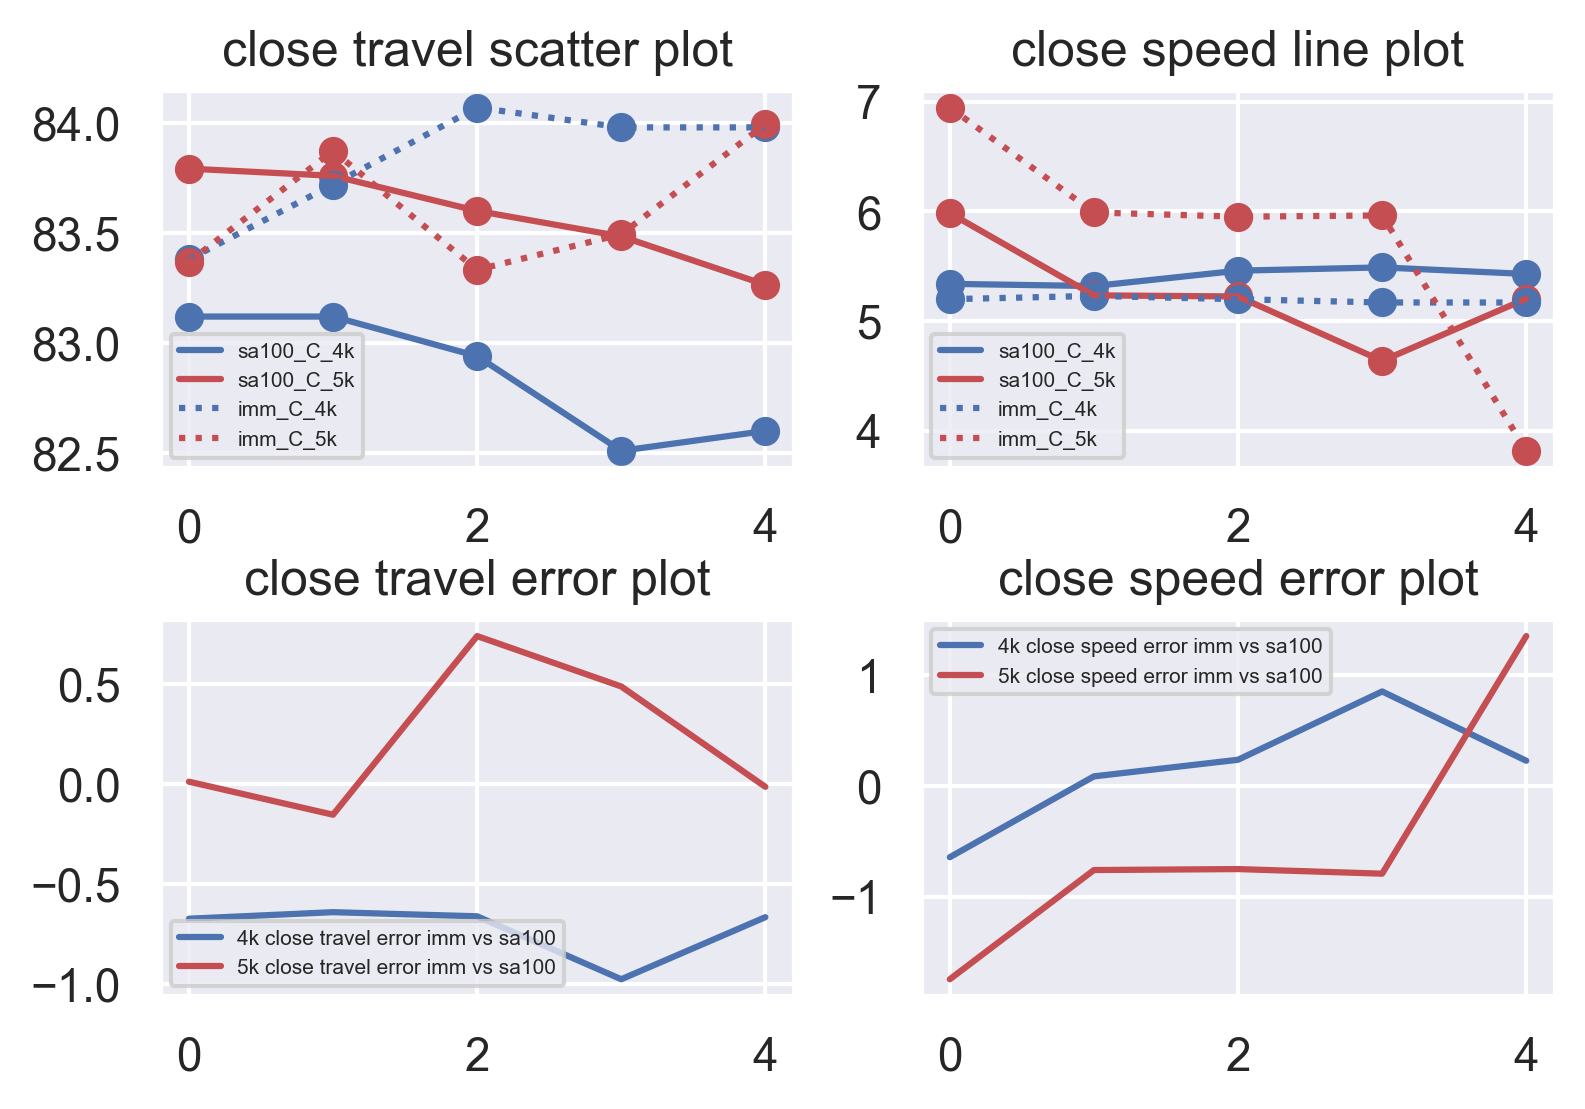

In [18]:
# line plot for close travel and error
line_list = ['-','-',':',':']
line_color_list = ['b','r','b','r']
line_label_list = ['sa100_C_4k','sa100_C_5k','imm_C_4k','imm_C_5k']
plt.figure(dpi=300)
plt.subplot(2,2,1)
plt.title('close travel scatter plot')
for num, ele in enumerate([2,6,10,14]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,3)
plt.title('close travel error plot')
plt.plot(result_narray[:,2] - 
		 result_narray[:,6], 
		 label='4k close travel error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,10] - 
		 result_narray[:,14], 
		 label='5k close travel error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
# plt.subplots_adjust(hspace=0.4)

# open line plot for speed
plt.subplot(2,2,2)
plt.title('close speed line plot')
for num, ele in enumerate([3,7,11,15]):
	plt.plot(result_narray[:,ele],
			label=line_label_list[num], 
			color=line_color_list[num],
			linestyle=line_list[num],
			)
	plt.scatter(range(len(result_narray)), 
				result_narray[:,ele],
				color=line_color_list[num]
				)
plt.legend(fontsize=5)

plt.subplot(2,2,4)
plt.title('close speed error plot')
plt.plot(result_narray[:,3] - 
		 result_narray[:,7], 
		 label='4k close speed error imm vs sa100',
		 color='b')
plt.plot(result_narray[:,11] - 
		 result_narray[:,15], 
		 label='5k close speed error imm vs sa100',
		 color='r')
plt.legend(fontsize=5)
plt.subplots_adjust(hspace=0.4)